In [10]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer




In [6]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [5]:
df['Open_report phase_2'] = df['Open_report phase_2'].astype(str)


df['Open_report phase_2'].dtypes # the type is object probably because there are mixed types inside the column (text, numbers, etc.)


dtype('O')

In [6]:
# Saving the open answers column into variable

answers = df['Open_report']

answers

0                                                   nan
1     I was sitting on the couch in my friend's livi...
2     I was with my friend and our acquaintance at m...
3     i don't remember a lot of the very specific de...
4     (my home, I had several days between travels, ...
5     I did a two day retreat where the experiences ...
6     I felt very tactical and wanted to hug and tou...
7                                                   nan
8               Made connection to my 'internal family'
9     I had 5 g of Cubensis to an empty stomach, acc...
10    An American and Australian couple I knew from ...
11    I was once again lost yet found. Coming out fr...
12    About five years ago, I had never heard of psy...
13    I was with close friend. We took mushrooms wha...
14    I drank tea made of the mushrooms, and soon af...
15    My guide to the Experience is quite fluent whe...
16    Intense “insight” as I could clearly see thing...
17    Testing out a new way of making tea from m

### Checking basic distributions

<Axes: >

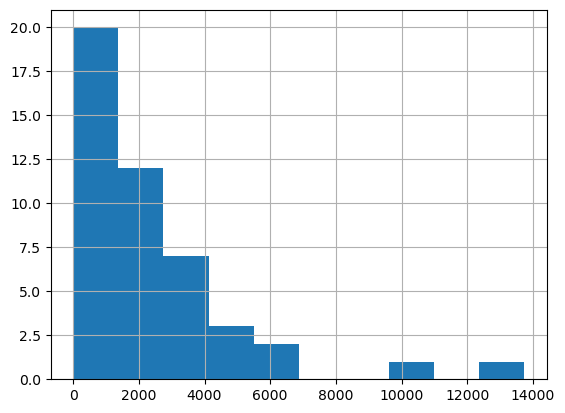

In [7]:
# Average length of each answer

answers.str.len().hist()



<Axes: >

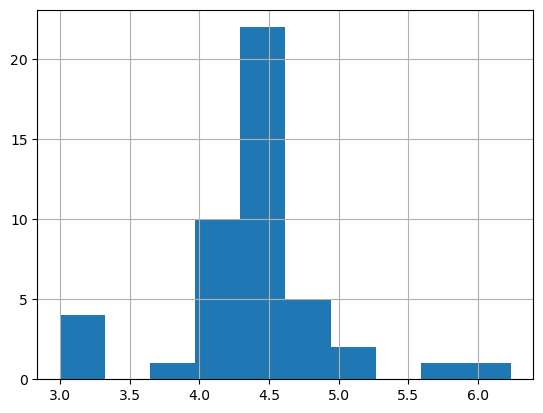

In [8]:
# Average length of each word

answers.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

### Stopwords

In [9]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/konsta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

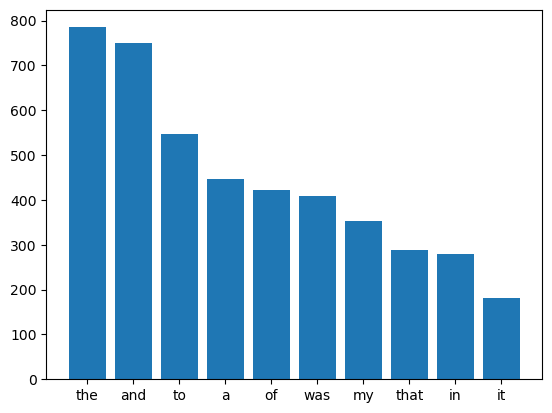

In [10]:
corpus = []
words = answers.str.split()
words = words.values.tolist()
corpus = [word for i in words for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

#print(dic)

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

<Axes: >

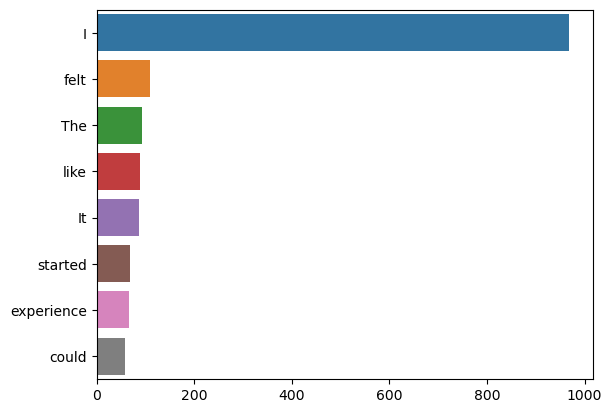

In [11]:
from collections import  Counter


counter=Counter(corpus)
most=counter.most_common()
x, y=[], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [12]:
# Most common ngrams

from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


<Axes: >

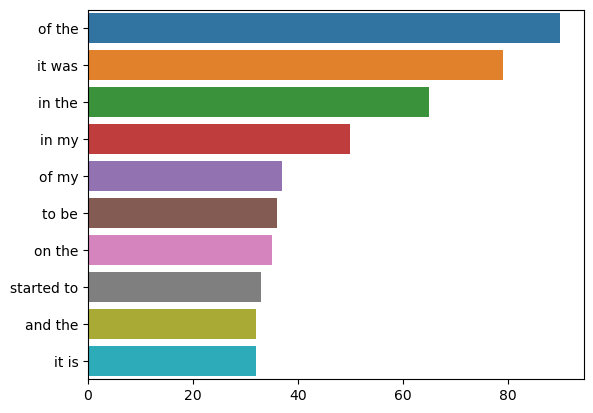

In [13]:
# Checking top bigrams

top_n_bigrams=get_top_ngram(answers,2)[:10] 

x,y=map(list,zip(*top_n_bigrams)) 

sns.barplot(x=y,y=x)

<Axes: >

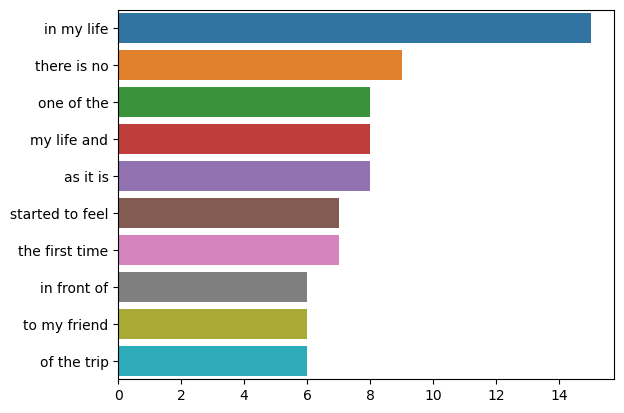

In [14]:
# Checking top trigrams

top_tri_grams=get_top_ngram(answers,n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

### Pre-processing


In [15]:
nltk.download('punkt')
nltk.download('wordnet')



corpus=[]

stem=PorterStemmer()
lem=WordNetLemmatizer()

for news in answers:
    words=[w for w in word_tokenize(answers) if (w not in stop)]

    words=[lem.lemmatize(w) for w in words if len(w)>2]

    corpus.append(words)



corpus

[nltk_data] Downloading package punkt to /Users/konsta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/konsta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NameError: name 'PorterStemmer' is not defined

In [ ]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

### The LDA model

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

# New round with spell-corrected data including sentiment analysis

In [3]:
df = pd.read_csv('Thesis_ Fixing typos for aggregated survey data (latest version) - Sheet1.csv')

df

,variant,group,age,gender_1F_2M_3O,education_level,education_level_otherSpecification,income_level,Country_birth,English_proficiency,religion,religion_other_spec,meditation_freq,meditation_howlong,medit_type_silent,medit_type_voice,medit_type_breath,medit_type_body,medit_type_mindfulness,bg_medit_type_other,classicalPsych_frequency,TimeSinceLastClassicalPsych,Psychiatric_No_disclosure,Psychiatric_severe_depression,Psychiatric_bipolar,Psychiatric_psychosis,Psychiatric_anxiety,Psychiatric_ASD,Psychiatric_OCD,Psychiatric_ADHD,psychiatric_other,psychiatric_selfdiagnosed,substance_use_problem,ESP1_INV,2 ESP,3 ESP,4 ESP,exp_LSD,exp_psilocybin,exp_ayahuasca,exp_DMT,exp_5meoDMT,exp_mescaline,exp_ibogaine,exp_salvia,exp_mdma,exp_ketamine,exp_cannabis,other_drug_dummy,exp_other_drug,how_many_drugs,exp_drug_dose,exp_drug_dose_specific,exp_drug_intensity,exp_drug_confidence,exp_medit_silent,exp_medit_voice,exp_medit_breath,exp_medit_body,exp_medit_mindfulness,exp_other_medit,exp_meditation_technique_specific,exp_medit_drug,exp_medit_drugSpecification,exp_when,exp_where,exp_who,exp_guide,exp_purpose_nospecific,exp_purpose_relax_enjoy,exp_purpose_spiritual,exp_purpose_therapeutic,exp_purpose_curiosity,exp_purpose_social,exp_purpose_selfimprovement,exp_purpose_distraction,exp_purpose_other,exp_other_purpose,exp_planned,exp_expect,exp_drug_meditation,exp_drug_medit_silent,exp_drug_medit_voice,exp_drug_medit_breath,exp_drug_medit_body,exp_drug_medit_mindfulness,exp_drug_medit_otherSpecify,Open_report,Open_report typo-corrected,open_report_characters,body_yes_no,Thematic_body,insight_yes_no,Thematic_insights,connection_or_alienation_yes_no,Thematic_connection,preposts_satisfied,preposts_positive,preposts_negative,preposts_meaning,preposts_peace_harmony,prepost_bodydissat,prepost_bodyappre,prepost_embodiment,MEQ30_Q1_mystical,MEQ30_Q2_mystical,MEQ30_Q3_mystical,MEQ30_Q4_mystical,MEQ30_Q5_mystical,MEQ30_Q6_mystical,MEQ30_Q7_mystical,MEQ30_Q8_mystical,MEQ30_Q9_mystical,MEQ30_Q10_mystical,MEQ30_Q11_mystical,MEQ30_Q12_mystical,MEQ30_Q13_mystical,MEQ30_Q14_mystical,MEQ30_Q15_mystical,MEQ30_Q16_positive_mood,MEQ30_Q17_positive_mood,MEQ30_Q18_positive_mood,MEQ30_Q19_positive_mood,MEQ30_Q20_positive_mood,MEQ30_Q21_positive_mood,MEQ30_Q22_transcendence,MEQ30_Q23_transcendence,MEQ30_Q24_transcendence,MEQ30_Q25_transcendence,MEQ30_Q26_transcendence,MEQ30_Q27_transcendence,MEQ30_Q28_ineffability,MEQ30_Q29_ineffability,MEQ30_Q30_ineffability,MEQ30_sum,WEMWBS_optimistic,WEMWBS_useful,WEMWBS_relaxed,WEMWBS_dealing_w_problems,WEMWBS_thinking_clearly,WEMWBS_close_to_others,WEMWBS_make_up_my_own_mind,PoMS_1,PoMS_2,PoMS_3,PoMS_4,PoMS_5_INV,PoMS_6,PoMS_7_INV,BAS1,BAS2,BAS3,BAS4,BAS5,BAS6,BAS7,BAS8,BAS9,BAS10,psy_flex1,psy_flex2,psy_flex3,psy_flex4,psy_flex5,psy_flex6,SVS_1_Power,userid
0,med1,meditation,64,2,4,NaN,2,Sweden,1,3,NaN,6,6,0,0,0,0,1,NaN,3,0,0,0,0,0,1,0,0,0,NaN,NaN,999,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,"Anapana, vipassana",1.0,NaN,6,0,0,0,0,0,0,0,0,0,1,0,0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,There is a fundamental concept in Buddhism cal...,There is a fundamental concept in Buddhism cal...,408,1,I went into this in the previous question.,1,A deep understanding of what anicca means.,3,NaN,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,47.0,4,4,4,4,4,4,4,3,3,3,3,2,3,1,3,3,4,3,4,2,2,2,3,2,5,5,4,4,4,4,7,6097026029595349a
1,med1,meditation,31,2,7,NaN,4,India,1,5,NaN,4,5,0,0,0,0,1,Vipassana,0,0,0,0,0,0,0,0,0,0,NaN,Mild anxiety,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,single,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,Vipassana,1.0,NaN,7,5,3,1,0,0,1,0,0,0,0,0,0,NaN,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I developed all positive feelings. All thought...,I developed all positive feelings. All thought...,158,3,NaN,1,I realized I love my family. I realized that I...,2,NaN,3.0,5.0,

In [4]:
# Only keeping the columns that we need

columns_to_keep = ['group', 'Open_report typo-corrected']

df = df[columns_to_keep] 

df

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...
...,...,...
208,psychedelics,"It's impossible to write down what happened, a..."
209,psychedelics,You are okay I took approximately half of what...
210,psychedelics,There was an intention setting and intake appt...
211,psychedelics,My memory is quite vague as it was almost 5 ye...


In [5]:
df = df.dropna(subset=['Open_report typo-corrected'])

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 212
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   group                       203 non-null    object
 1   Open_report typo-corrected  203 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [7]:
df['group'] = df['group'].astype('category')
df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_11744/3570789679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = df['group'].astype('category')
/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_11744/3570789679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open_report typo-corrected'] = df['Open_report typo-corrected'].astype('string')


In [8]:
# Differentiating between the psychedelics and meditation groups

psyke = df[df['group']=='psychedelics']
#psyke['Open_report'] = psyke['Open_report'].astype(str)

medi = df[df['group']=='meditation']
#medi['Open_report'] = medi['Open_report'].astype(str)

psyke

,group,Open_report typo-corrected
66,psychedelics,I was in my friends' apartment when we took ls...
67,psychedelics,You mean the very last experience? I took some...
68,psychedelics,After first time of eating mushrooms I get awa...
69,psychedelics,I was with a few close friends. We took some s...
70,psychedelics,"As many other testimonials, i experienced a co..."
71,psychedelics,"At first I felt the effect coming on, like 'so..."
72,psychedelics,Vaporized some 5-meo dmt at my friends cottage...
73,psychedelics,I was introduced to the realm of spirit. I had...
74,psychedelics,I kept a journal of my experience to best of m...
75,psychedelics,Met some helpful and kind spirits for a very s...


In [9]:
medi

,group,Open_report typo-corrected
0,meditation,There is a fundamental concept in Buddhism cal...
1,meditation,I developed all positive feelings. All thought...
2,meditation,I had recently lost my father unexpectedly. A ...
3,meditation,There was an objective experience of the self ...
4,meditation,Deep abiding peace with understanding of the i...
5,meditation,Silence of mind and timelessness
6,meditation,I was able to see Buddha seated in a grassy ar...
7,meditation,We know other people for many years and we gat...
8,meditation,"First, your survey structure is likely to miss..."
9,meditation,"I felt all thinking was still there, but it wa..."


# Finding the topics with LDA

In [10]:
# Preprocessing 
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

psyke_pre_processed_answers = psyke['Open_report typo-corrected'].apply(preprocess_text)
medi_pre_processed_answers = medi['Open_report typo-corrected'].apply(preprocess_text)

# Create a document-term matrix
vectorizer = CountVectorizer()
psyke_dtm = vectorizer.fit_transform(psyke_pre_processed_answers)
medi_dtm = vectorizer.fit_transform(medi_pre_processed_answers)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

# Assuming you want to extract n topics, adjust this as needed
num_topics = 10

psyke_lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
psyke_lda.fit(psyke_dtm)


LatentDirichletAllocation(random_state=42)

In [20]:
def get_top_words(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

top_words = get_top_words(psyke_lda, vectorizer)
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

IndexError: index 2734 is out of bounds for axis 0 with size 2592

In [14]:
medi_lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

medi_lda.fit(medi_dtm)

LatentDirichletAllocation(n_components=30, random_state=42)

In [15]:
def get_top_words(model, vectorizer, n_words=10):
    words = vectorizer.get_feature_names_out()
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[-n_words:][::-1]
        top_words = [words[i] for i in top_words_idx]
        topics[f"Topic {topic_idx+1}"] = top_words
    return topics

top_words = get_top_words(medi_lda, vectorizer)
for topic, words in top_words.items():
    print(f"{topic}: {', '.join(words)}")

Topic 1: life, yet, time, experience, state, union, pause, merely, spectrum, could
Topic 2: experience, like, sense, always, time, year, different, really, people, many
Topic 3: light, experience, time, felt, life, never, moved, guide, feeling, thought
Topic 4: experience, felt, like, body, meditation, could, mind, time, back, practice
Topic 5: day, one, experience, feel, level, rainbow, meditation, state, time, meditate
Topic 6: mind, feeling, screen, bliss, positive, looked, developed, visible, first, thought
Topic 7: father, experience, meditation, understanding, able, relationship, compassion, day, child, retreat
Topic 8: noted, thought, sensation, experience, breath, practice, think, several, sitting, aware
Topic 9: experience, moment, body, meditation, feel, unihalvaus, move, like, since, pain
Topic 10: kundalini, felt, retreat, eye, body, meditation, happened, around, year, phenomenon
Topic 11: heart, time, retreat, much, area, prayer, mind, le, etc, attention
Topic 12: experien

In [12]:
# Adding topic column to the dataset
topic_distribution = lda.transform(dtm)
df['topic'] = topic_distribution.argmax(axis=1)

In [20]:
df

,age phase_0,gender_1F_2M_3O phase_0,education_level phase_0,education_level_otherSpecification phase_0,income_level phase_0,Country_birth phase_0,English_proficiency phase_0,religion phase_0,religion_other_spec phase_0,meditation_freq phase_0,meditation_howlong phase_0,medit_type_silent phase_0,medit_type_voice phase_0,medit_type_breath phase_0,medit_type_body phase_0,medit_type_mindfulness phase_0,bg_medit_type_other phase_0,classicalPsych_frequency phase_0,TimeSinceLastClassicalPsych phase_0,Psychiatric_No_disclosure phase_0,Psychiatric_severe_depression phase_0,Psychiatric_bipolar phase_0,Psychiatric_psychosis phase_0,Psychiatric_anxiety phase_0,Psychiatric_ASD phase_0,Psychiatric_OCD phase_0,Psychiatric_ADHD phase_0,psychiatric_other phase_0,psychiatric_selfdiagnosed phase_0,substance_use_problem phase_0,ESP1_INV phase_0,ESP2 phase_0,ESP3 phase_0,ESP4 phase_0,exp_LSD phase_1,exp_psilocybin phase_1,exp_ayahuasca phase_1,exp_DMT phase_1,exp_5meoDMT phase_1,exp_mescaline phase_1,exp_ibogaine phase_1,exp_salvia phase_1,exp_mdma phase_1,exp_ketamine phase_1,exp_cannabis phase_1,exp_other_drug phase_1,exp_drug_dose phase_1,exp_drug_dose_specific phase_1,exp_drug_intensity phase_1,exp_drug_confidence phase_1,exp_when phase_1,exp_where phase_1,exp_who phase_1,exp_guide phase_1,exp_purpose_nospecific phase_1,exp_purpose_relax_enjoy phase_1,exp_purpose_spiritual phase_1,exp_purpose_therapeutic phase_1,exp_purpose_curiosity phase_1,exp_purpose_social phase_1,exp_purpose_selfimprovement phase_1,exp_purpose_distraction phase_1,exp_purpose_other phase_1,exp_other_purpose phase_1,exp_planned phase_1,exp_expect phase_1,exp_drug_meditation phase_1,exp_drug_medit_silent phase_1,exp_drug_medit_voice phase_1,exp_drug_medit_breath phase_1,exp_drug_medit_body phase_1,exp_drug_medit_mindfulness phase_1,exp_drug_medit_otherSpecify phase_1,Open_report phase_2,connection_or_alienation_yes_no phase_3,Thematic_connection phase_3,body_yes_no phase_4,Thematic_body phase_4,insight_yes_no phase_5,Thematic_insights phase_5,preposts_satisfied phase_6,preposts_positive phase_6,preposts_negative phase_6,preposts_meaning phase_6,preposts_peace_harmony phase_6,prepost_bodydissat phase_6,prepost_bodyappre phase_6,prepost_embodiment phase_6,MEQ30_Q1_mystical phase_7,MEQ30_Q2_mystical phase_7,MEQ30_Q3_mystical phase_7,MEQ30_Q4_mystical phase_7,MEQ30_Q5_mystical phase_7,MEQ30_Q6_mystical phase_7,MEQ30_Q7_mystical phase_7,MEQ30_Q8_mystical phase_7,MEQ30_Q9_mystical phase_7,MEQ30_Q10_mystical phase_7,MEQ30_Q11_mystical phase_7,MEQ30_Q12_mystical phase_7,MEQ30_Q13_mystical phase_7,MEQ30_Q14_mystical phase_7,MEQ30_Q15_mystical phase_7,MEQ30_Q16_positive_mood phase_7,MEQ30_Q17_positive_mood phase_7,MEQ30_Q18_positive_mood phase_7,MEQ30_Q19_positive_mood phase_7,MEQ30_Q20_positive_mood phase_7,MEQ30_Q21_positive_mood phase_7,MEQ30_Q22_transcendence phase_7,MEQ30_Q23_transcendence phase_7,MEQ30_Q24_transcendence phase_7,MEQ30_Q25_transcendence phase_7,MEQ30_Q26_transcendence phase_7,MEQ30_Q27_transcendence phase_7,MEQ30_Q28_ineffability phase_7,MEQ30_Q29_ineffability phase_7,MEQ30_Q30_ineffability phase_7,BAS1 phase_9,BAS2 phase_9,BAS3 phase_9,BAS4 phase_9,BAS5 phase_9,BAS6 phase_9,BAS7 phase_9,BAS8 phase_9,BAS9 phase_9,BAS10 phase_9,SVS_1_Power phase_10,psy_flex1 phase_11,psy_flex2 phase_11,psy_flex3 phase_11,psy_flex4 phase_11,psy_flex5 phase_11,psy_flex6 phase_11,PoMS_1 phase_12,PoMS_2 phase_12,PoMS_3 phase_12,PoMS_4 phase_12,PoMS_5_INV phase_12,PoMS_6 phase_12,PoMS_7_INV phase_12,WEMWBS_optimistic phase_13,WEMWBS_useful phase_13,WEMWBS_relaxed phase_13,WEMWBS_dealing_w_problems phase_13,WEMWBS_thinking_clearly phase_13,WEMWBS_close_to_others phase_13,WEMWBS_make_up_my_own_mind phase_13,userid,topic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
psyke['Open_report'] = psyke['Open_report'].astype(str)

### Sentiment analysis

In [25]:
psyke.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 66 to 212
Data columns (total 166 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    variant                             object 
 1    group                               object 
 2    age                                 int64  
 3    gender_1F_2M_3O                     int64  
 4    education_level                     int64  
 5    education_level_otherSpecification  object 
 6    income_level                        int64  
 7    Country_birth                       object 
 8    English_proficiency                 int64  
 9    religion                            int64  
 10   religion_other_spec                 object 
 11   meditation_freq                     int64  
 12   meditation_howlong                  int64  
 13   medit_type_silent                   int64  
 14   medit_type_voice                    int64  
 15   medit_type_breath                   i

In [24]:
psyke['Open_report'] = psyke['Open_report'].astype(str)

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_79946/5930482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  psyke['Open_report'] = psyke['Open_report'].astype(str)


In [36]:
medi.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 166 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    variant                             object 
 1    group                               object 
 2    age                                 int64  
 3    gender_1F_2M_3O                     int64  
 4    education_level                     int64  
 5    education_level_otherSpecification  object 
 6    income_level                        int64  
 7    Country_birth                       object 
 8    English_proficiency                 int64  
 9    religion                            int64  
 10   religion_other_spec                 object 
 11   meditation_freq                     int64  
 12   meditation_howlong                  int64  
 13   medit_type_silent                   int64  
 14   medit_type_voice                    int64  
 15   medit_type_breath                   int6

In [37]:
medi['Open_report'] = medi['Open_report'].astype(str)

/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_79946/384631327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Open_report'] = medi['Open_report'].astype(str)


In [18]:
pip install vaderSentiment


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 888.2 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Apply the function to the DataFrames
psyke['Sentiment'] = psyke['Open_report'].apply(get_sentiment_scores)
medi['Sentiment'] = medi['Open_report'].apply(get_sentiment_scores)


/var/folders/1_/ff72pvzx3tqc2qtzyq7wlzxm0000gn/T/ipykernel_79946/3934087539.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medi['Sentiment'] = medi['Open_report'].apply(get_sentiment_scores)


,Open_report,Sentiment
66,I was in my friends apartment when we took lsd...,0.9818
67,You mean the very last experience? I took some...,0.5668
68,After first time of eating mushrooms I get awa...,0.7506
69,I was with a few close friends. We took some s...,0.5106
70,"As many other testimonials, i experienced a co...",0.9332
71,"At first I felt the effect coming on, like 'so...",-0.9896
72,Vaporized some 5-meo dmt at my friends cottage...,0.9046
73,I was introduced to the realm of spirit. I had...,0.3230
74,I kept a journal of my experience to best of m...,0.9964
75,Met some helpful and kind spirits for a very s...,0.6310


In [41]:
medi

,Open_report,Sentiment
0,There is a fundamental concept in Buddhism cal...,0.3182
1,I developed all positive feelings. All thought...,0.8689
2,I had recently lost my father unexpectedly. A ...,-0.9578
3,There was an objective experience of the self ...,0.0258
4,Deep abiding peace with understanding of the i...,0.6705
5,Silence of mind and timelessness,0.0000
6,I was able to see Buddha seated in a grassy ar...,0.8744
7,We know other people for many years and we gat...,0.7960
8,"First, your survey structure is likely to miss...",0.9981
9,"I felt all thinking was still there, but it wa...",0.9757


### Sentiment visualisation

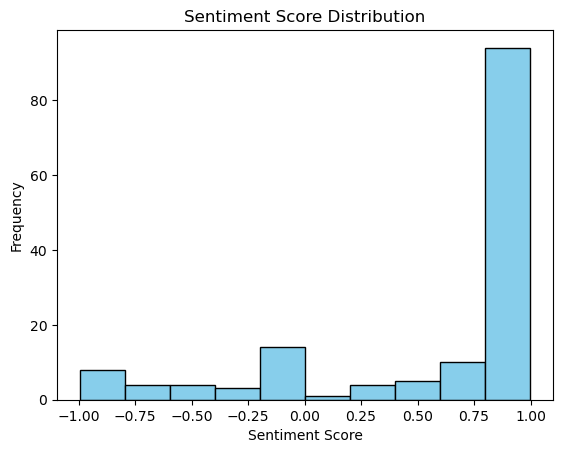

In [31]:
# Creating a sentiment histogram
plt.hist(psyke['Sentiment'], bins=10, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')

# Show the plot
plt.show()

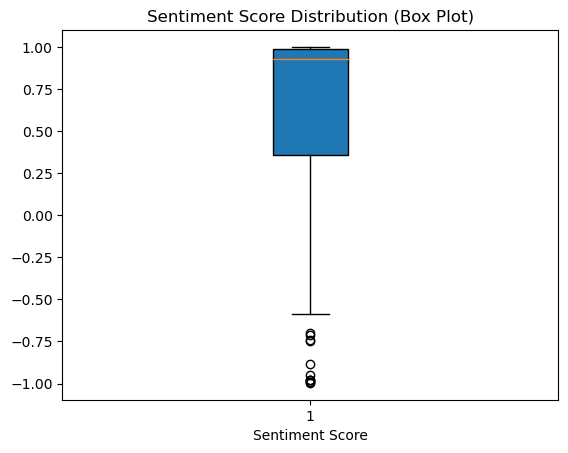

In [35]:
# Creating a box plot
plt.boxplot(psyke['Sentiment'], vert=True, patch_artist=True)

# Add labels and a title
plt.xlabel('Sentiment Score')
plt.title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

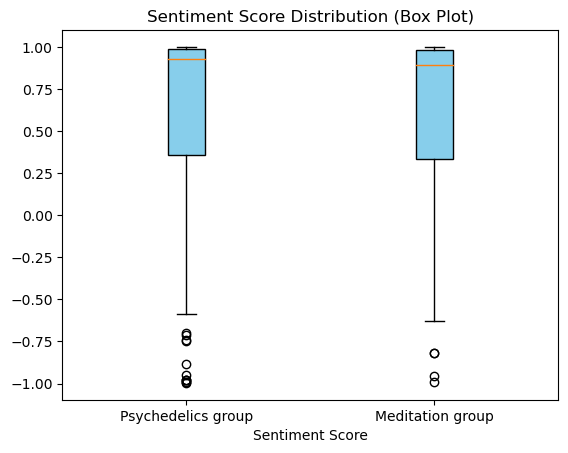

In [62]:
# Create a figure and axis
fig, ax = plt.subplots()

# Create box plots for each DataFrame
boxplot1 = ax.boxplot(psyke['Sentiment'], vert=True, patch_artist=True, positions=[1], labels=['Psychedelics group'])
boxplot2 = ax.boxplot(medi['Sentiment'], vert=True, patch_artist=True, positions=[2], labels=['Meditation group'])

# Customize colors
colors = ['skyblue', 'lightcoral']
for box in [boxplot1, boxplot2]:
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

# Add labels and a title
ax.set_xlabel('Sentiment Score')
ax.set_title('Sentiment Score Distribution (Box Plot)')

# Show the plot
plt.show()

In [61]:
psyke_avg = round(psyke['Sentiment'].mean(), 2)
psyke_std = round(psyke['Sentiment'].std(), 2)

psyke_median = round(psyke['Sentiment'].median(), 2)


medi_avg = round(medi['Sentiment'].mean(), 2)
medi_std = round(medi['Sentiment'].std(), 2)

medi_median = round(medi['Sentiment'].median(), 2)


print('Psychedelics average sentiment score: '+str(psyke_avg)+ ' ('+str(psyke_std) +').')
print('Meditation average sentiment score: '+str(medi_avg)+ ' ('+str(medi_std)+').')
print('Psychedelics median: ' +str(psyke_median))
print('Meditation median: ' +str(medi_median))

Psychedelics average sentiment score: 0.6 (0.6).
Meditation average sentiment score: 0.57 (0.59).
Psychedelics median: 0.93
Meditation median: 0.89
